I. About dataset

1.Tổng quan: Dataset có 569 mẫu dữ liệu.

Bao gồm 32 cột, trong đó có:

1 cột id (mã bệnh nhân).

1 cột diagnosis (chẩn đoán, với giá trị "M" cho ác tính và "B" cho lành tính).

30 cột còn lại là các đặc trưng y sinh liên quan đến hình dạng và tính chất tế bào.

2.Các cột dữ liệu quan trọng:

diagnosis: Nhãn phân loại bệnh (M = Ác tính, B = Lành tính).

Các đặc trưng được chia thành 3 nhóm chính:

Giá trị trung bình của đặc trưng (kết thúc bằng _mean).

Sai số chuẩn của đặc trưng (kết thúc bằng _se).

Giá trị lớn nhất của đặc trưng (kết thúc bằng _worst).

Ví dụ một số đặc trưng:

radius_mean: Bán kính trung bình của nhân tế bào.

texture_mean: Độ nhám trung bình của tế bào.

smoothness_mean: Độ trơn của tế bào.

compactness_mean: Độ đặc của nhân tế bào.

concavity_mean: Độ lõm của tế bào.

3.Mục đích sử dụng: Dataset này thường được dùng trong học máy (machine learning) để xây dựng mô hình chẩn đoán ung thư vú.

Giúp bác sĩ phân biệt giữa khối u lành tính và ác tính dựa trên các đặc trưng tế bào học.

Soure: https://www.kaggle.com/code/vikasukani/breast-cancer-prediction-using-machine-learning

In [ ]:
# import libraries for data processing
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Tải dữ liệu
file_path = '/content/drive/MyDrive/Breast Cancer.xlsx'

import pandas as pd

# Giao diện chọn file từ Drive
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_excel('Breast Cancer.xlsx')  # đúng tên file bạn vừa chọn
# Kiểm tra kích thước dữ liệu
print (df.shape)

# Hiển thị một vài dòng đầu
print ( df. head)

Saving Breast Cancer.xlsx to Breast Cancer (1).xlsx
(569, 32)
<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751    

1. Thông tin về tệp dữ liệu
Tên tệp: Breast Cancer.xlsx (định dạng Excel).

Kích thước: 154,933 bytes.

Số lượng mẫu: 569 dòng và 32 cột ((569, 32)).

3. Các đặc trưng (features) trong dữ liệu
Các đặc trưng trung bình (mean):

radius_mean: Bán kính trung bình của tế bào.

texture_mean: Độ lệch chuẩn của giá trị màu xám.

perimeter_mean: Chu vi trung bình.

area_mean: Diện tích trung bình.

smoothness_mean: Độ mịn trung bình (biến thiên trong bán kính).

Các đặc trưng "tệ nhất" (worst):

radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, v.v.

Đây là các giá trị lớn nhất hoặc "tệ nhất" quan sát được, thường có ý nghĩa trong chẩn đoán.

4. Giá trị của một số đặc trưng
Ví dụ về smoothness_mean:

Dòng 0: 0.11840

Dòng 1: 0.08474

...

Dòng 568 (cuối cùng): 0.05263 (giá trị thấp nhất, có thể liên quan đến khối u lành tính).

Ví dụ về smoothness_worst:

Dòng 0: 0.12320

Dòng 568: 0.08996 (giá trị thấp, phù hợp với diagnosis = B).

5. Ý nghĩa các cột cuối
concave points_worst: Số điểm lõm "tệ nhất".

symmetry_worst: Độ đối xứng "tệ nhất".

fractal_dimension_worst: Chiều fractal "tệ nhất".

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data = df.drop(columns=['id'])
data[data.columns[:10]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   diagnosis            569 non-null    object 
 1   radius_mean          569 non-null    float64
 2   texture_mean         569 non-null    float64
 3   perimeter_mean       569 non-null    float64
 4   area_mean            569 non-null    float64
 5   smoothness_mean      569 non-null    float64
 6   compactness_mean     569 non-null    float64
 7   concavity_mean       569 non-null    float64
 8   concave points_mean  569 non-null    float64
 9   symmetry_mean        569 non-null    float64
dtypes: float64(9), object(1)
memory usage: 44.6+ KB


Tổng quan DataFrame:

569 entries: Dữ liệu gồm 569 dòng (từ chỉ số 0 đến 568).

10 columns: 10 cột được chọn để hiển thị.

Thông tin từng cột:

diagnosis:

Kiểu dữ liệu (Dtype): object (thường là chuỗi, ở đây là M hoặc B tương ứng ác tính/lành tính).

569 non-null: Không có giá trị thiếu (null).

Các cột từ radius_mean đến symmetry_mean:

Kiểu dữ liệu: float64 (số thực).

Đều có 569 non-null, không bị thiếu dữ liệu.

Các đặc trưng này mô tả đặc điểm hình thái tế bào (ví dụ: bán kính, độ mịn, độ lồi, v.v.).

Bộ nhớ sử dụng: Khoảng 44.6 KB để lưu trữ 10 cột này.

3. Ý nghĩa các cột
diagnosis: Nhãn phân loại khối u (M: Malignant - Ác tính, B: Benign - Lành tính).

Các cột *_mean: Giá trị trung bình của đặc trưng tế bào, được tính từ ảnh sinh thiết. Ví dụ:

radius_mean: Bán kính trung bình của tế bào.

smoothness_mean: Độ mịn (biến thiên trong bán kính).

concave points_mean: Số điểm lõm trên tế bào.

4. Tại sao lại quan trọng?
Việc kiểm tra .info() giúp:

Xác định dữ liệu có bị thiếu hay không (qua non-null count).

Kiểm tra kiểu dữ liệu (Dtype) để đảm bảo phù hợp cho phân tích (ví dụ: diagnosis cần chuyển sang dạng số nếu dùng mô hình học máy).

Đánh giá kích thước dữ liệu (memory usage) để tối ưu hiệu suất.

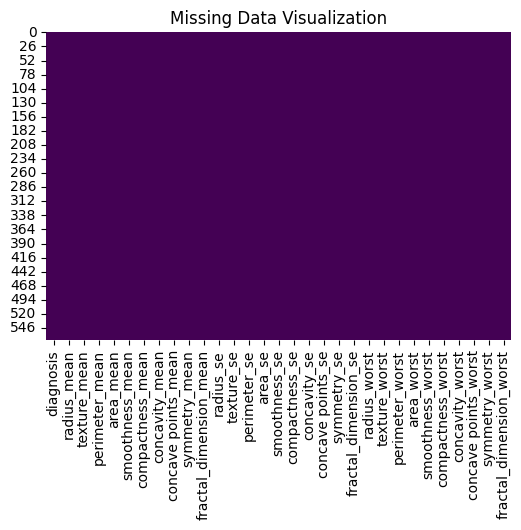

In [ ]:
# Identify missing data
missing_data = data.isnull().sum()

# Visualize missing data
plt.figure(figsize=(6, 4))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Visualization')
plt.show()

1. Giới thiệu về các trường dữ liệu
Danh sách các trường dữ liệu này thuộc bộ dữ liệu Ung thư vú (Breast Cancer Dataset), thường được dùng trong phân tích y khoa. Các trường bao gồm:

diagnosis: Chẩn đoán (lành tính/ác tính).

Các đặc tính hình ảnh khối u (ví dụ: radius, texture, perimeter), được tính toán theo 3 loại:

Hậu tố _mean: Giá trị trung bình.

Hậu tố _se: Sai số chuẩn (Standard Error).

Hậu tố _worst: Giá trị "tồi tệ nhất" (lớn nhất) quan sát được.

Ví dụ: radius_mean, texture_se, concave_points_worst.

2. Trực quan hóa dữ liệu thiếu (Missing Data Trực quan hóa dữ liệu)
Mục tiêu là phát hiện và hiển thị các giá trị thiếu (NaN/null) trong tập dữ liệu. Các phương pháp phổ biến:

a. Ma trận thiếu dữ liệu (Missingno Matrix)
Sử dụng thư viện missingno trong Python.

Mỗi dòng đại diện cho một mẫu dữ liệu, cột là các trường.

Ý nghĩa:

Vạch trắng: Dữ liệu thiếu.

Vạch đen: Dữ liệu tồn tại.

In [ ]:
# Identify duplicate data
duplicate_rows = data[data.duplicated()]

# Display duplicate rows if they exist
if not duplicate_rows.empty:
    print("\nDuplicated Rows:")
    print(duplicate_rows)
else:
    print("\nNo duplicated rows found.")

# Print the count of duplicate rows
print(f"\nNumber of Duplicated Rows: {len(duplicate_rows)}")


No duplicated rows found.

Number of Duplicated Rows: 0


In [ ]:
# Dropping duplicates and resetting the index
data = data.drop_duplicates().reset_index(drop=True)
print(data.shape)

(569, 31)


In [ ]:
# Generating summary statistics of the numerical columns
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# import libraries for data processing
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Assuming your data is in a file named 'Breast Cancer.xlsx'
# Replace 'your_file_path.xlsx' with the actual path if different
file_path = "Breast Cancer.xlsx"

try:
    xls = pd.ExcelFile(file_path)
    data = pd.read_excel(xls, sheet_name="data")  # Assign the dataframe to 'data'
except FileNotFoundError:
    print(f"Error: File not found at path: {file_path}")
except Exception as e:
    print(f"Error loading data: {e}")

# Now you can use 'data' in the subsequent code
# Chọn dữ liệu số
numerical_columns = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se'
]
numerical_data = data[numerical_columns] # Changed data_ticket_dysper to data
print("Numerical Data:\n", numerical_data)

# Chọn dữ liệu phân loại (ví dụ: cột 'disposits' nếu tồn tại)
# Chọn dữ liệu số
numerical_columns = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se'
]
numerical_data = data[numerical_columns] # Changed data_ticket_dysper to data
print("Numerical Data:\n", numerical_data)

# Chọn dữ liệu phân loại (ví dụ: cột 'disposits' nếu tồn tại)
categorical_columns = ['diagnosis']  # Thay bằng tên cột thực tế
categorical_data = data[categorical_columns] # Changed data_ticket_dysper to data
print("Categorical Data:\n", categorical_data)

Numerical Data:
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave

In [ ]:
for col in categorical_data:
    unique_values = data[col].unique()

    # Print unique values for the current column
    print(f"\nUnique Values in Column '{col}':")
    print(unique_values)

    # Optionally, print the value counts if needed
    # print(data[col].value_counts())


Unique Values in Column 'diagnosis':
['M' 'B']


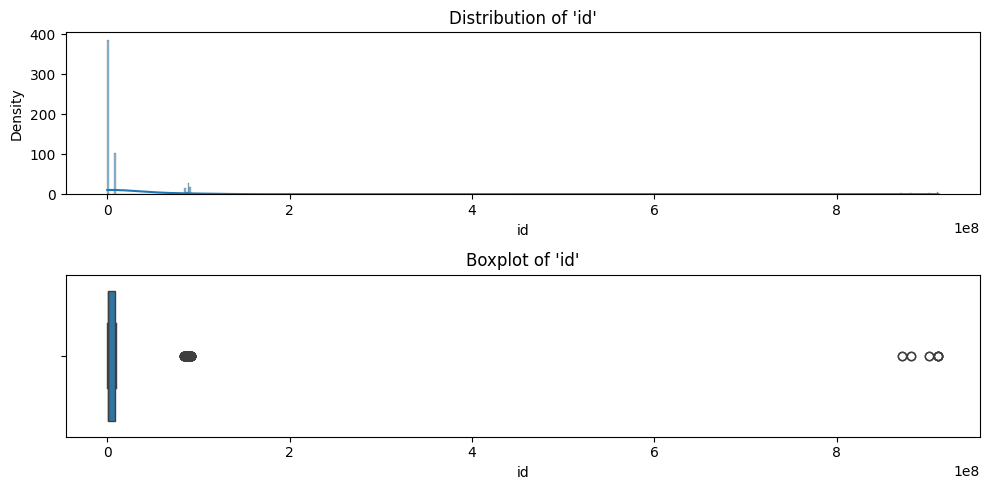

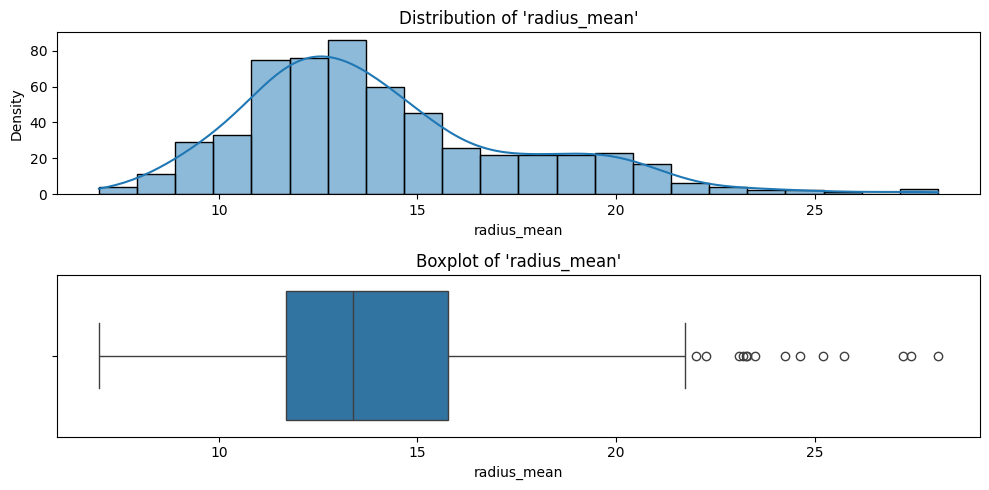

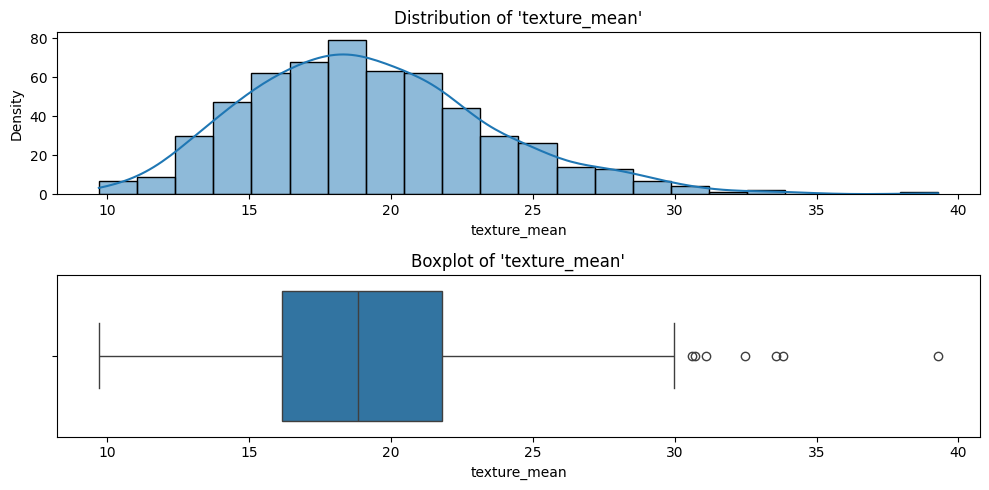

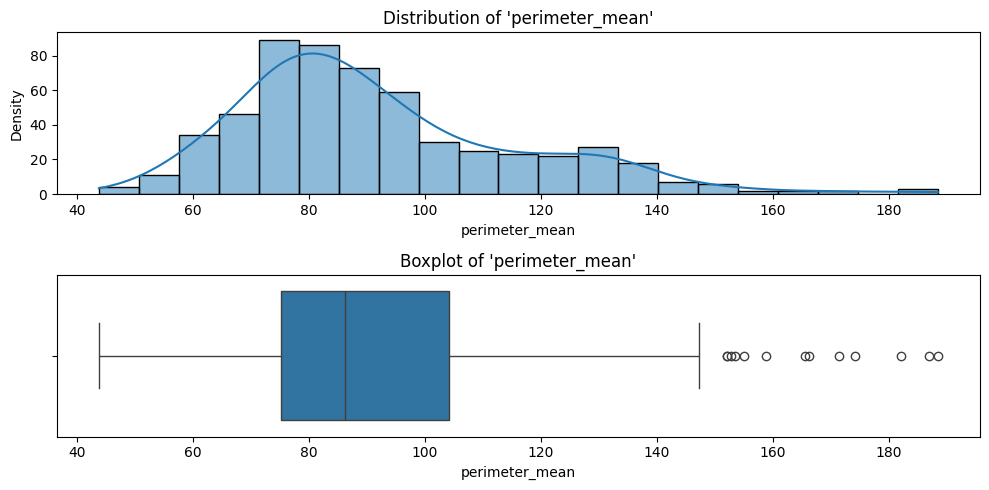

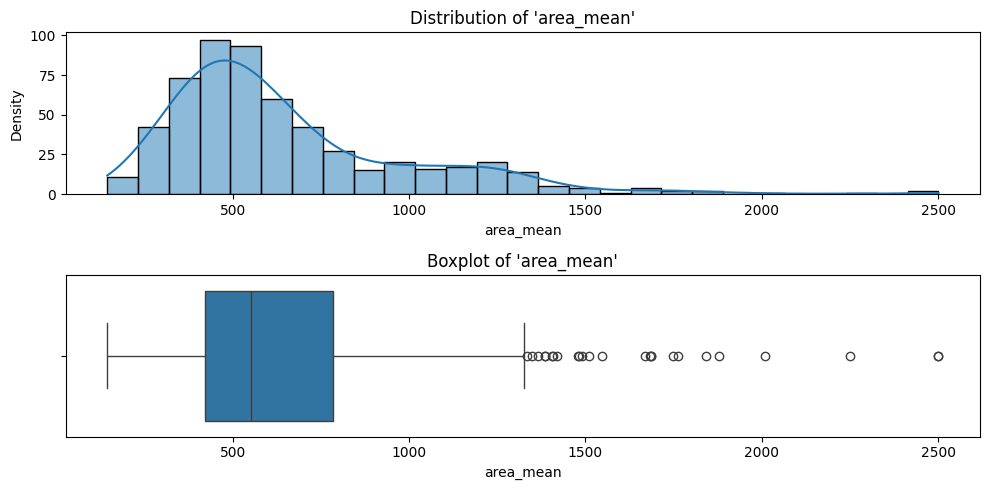

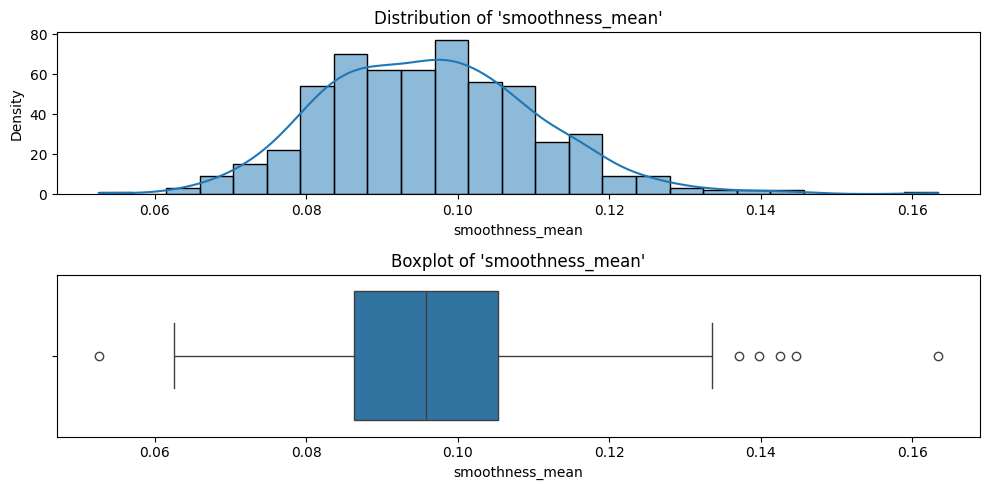

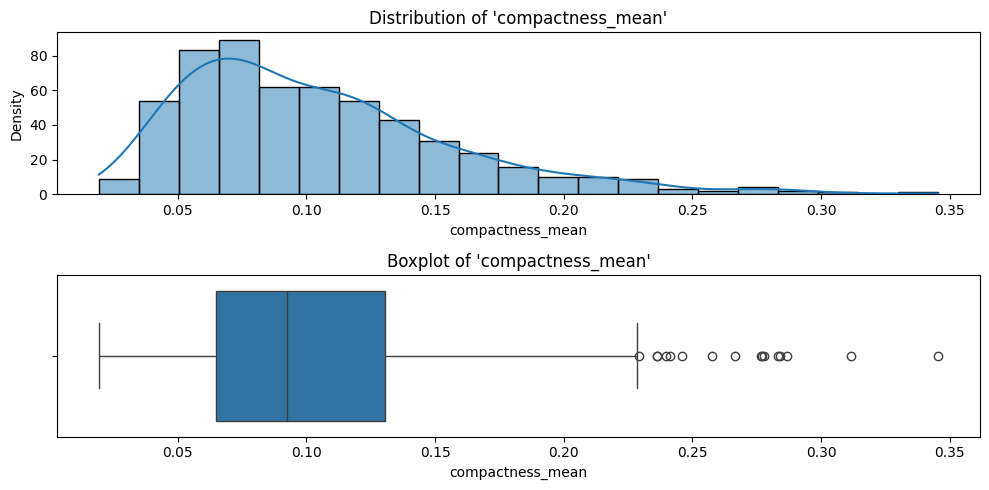

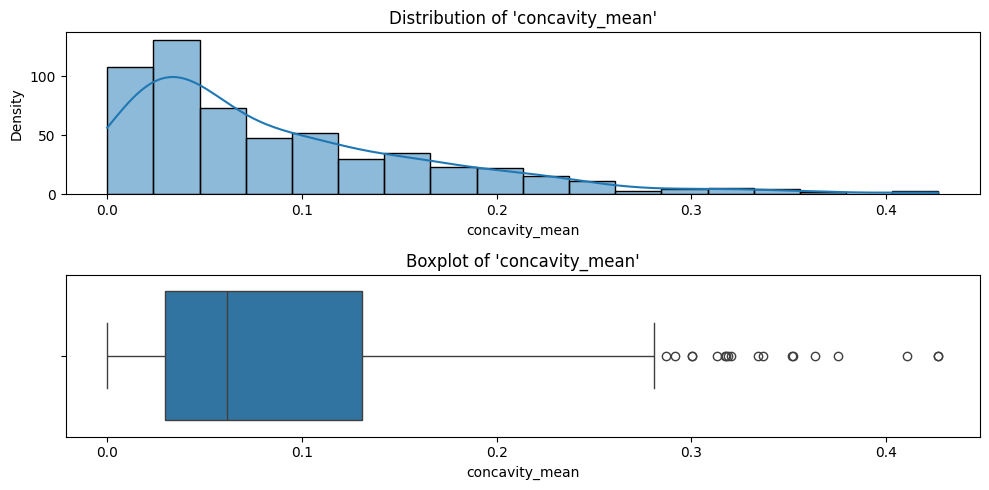

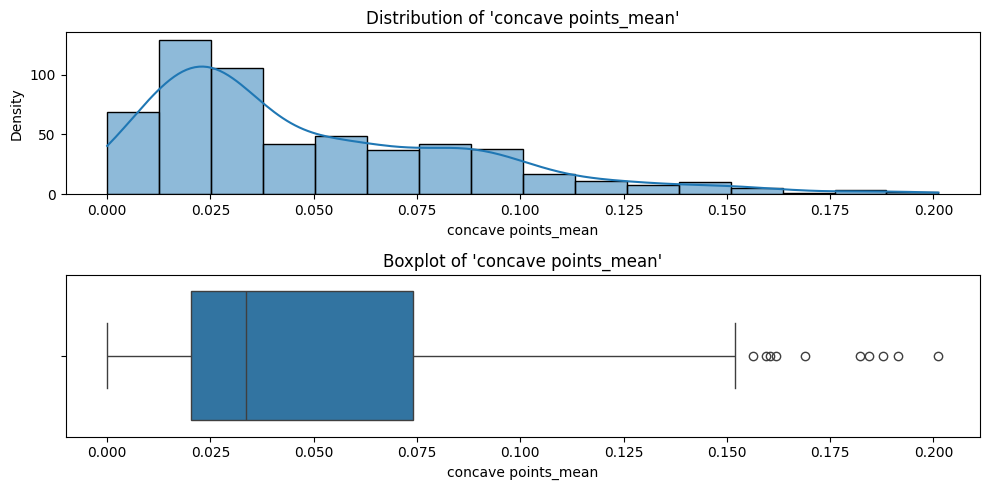

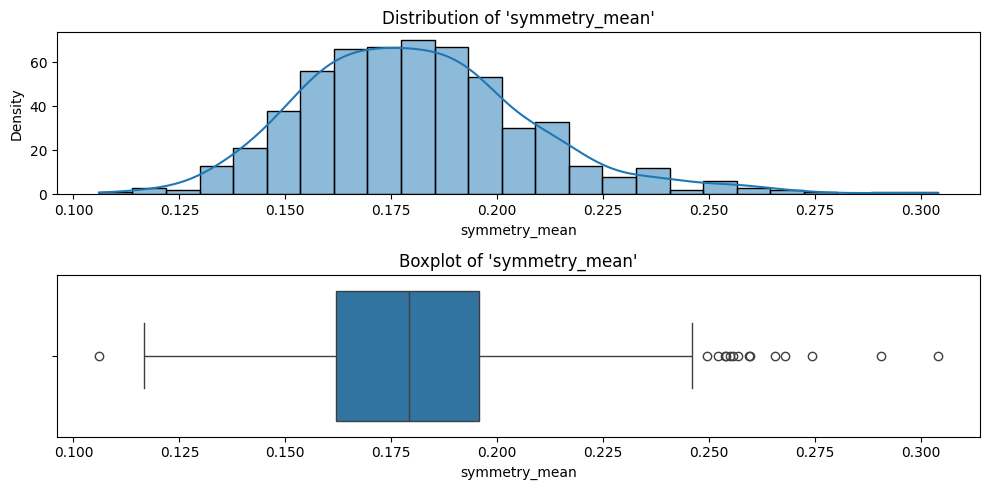

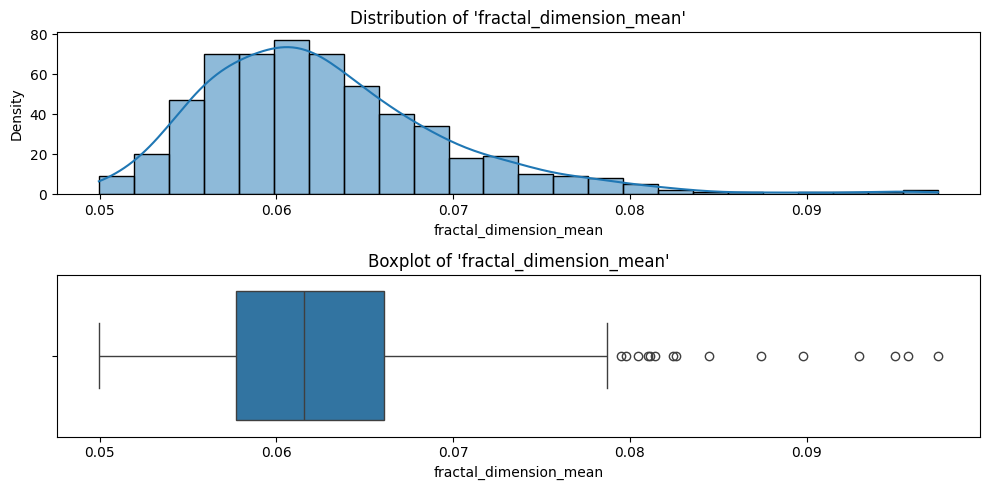

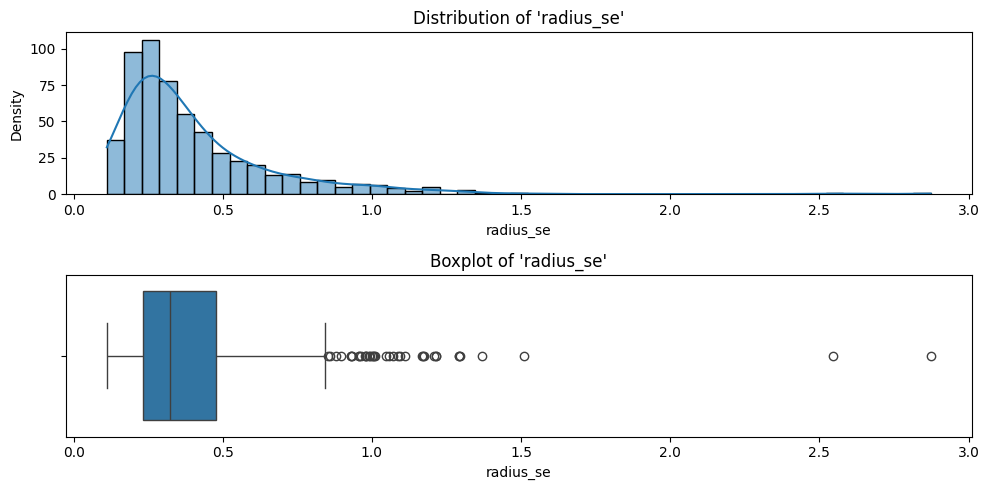

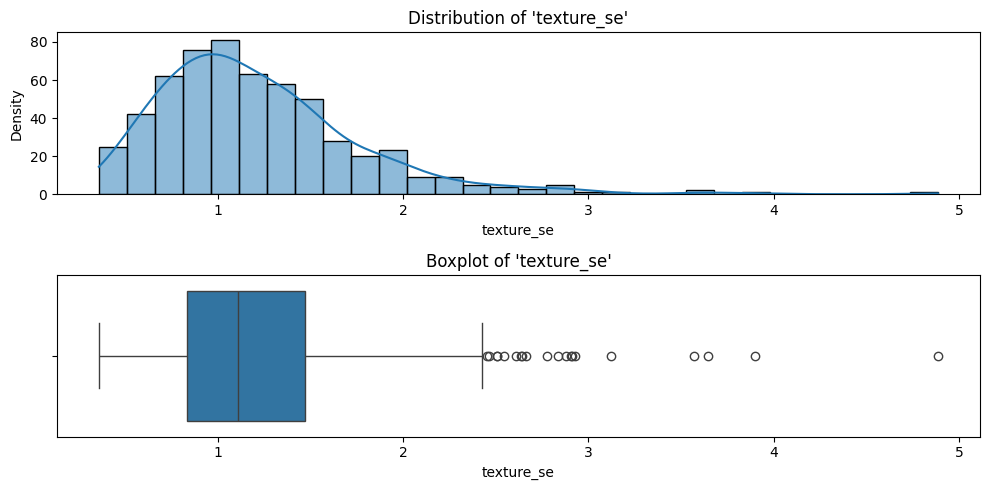

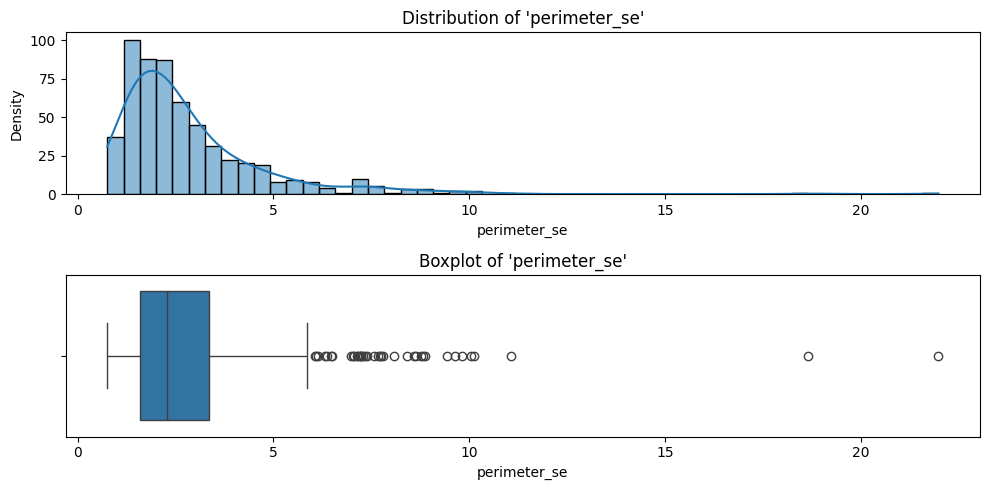

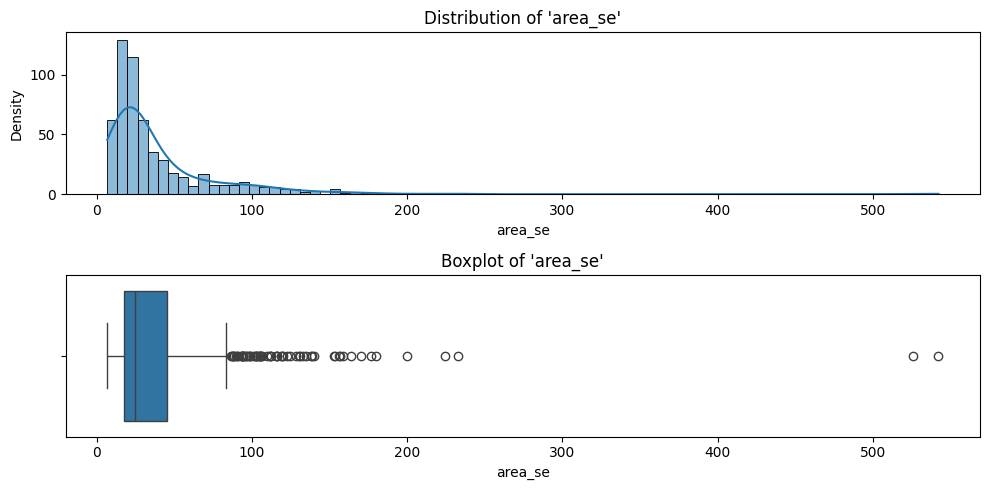

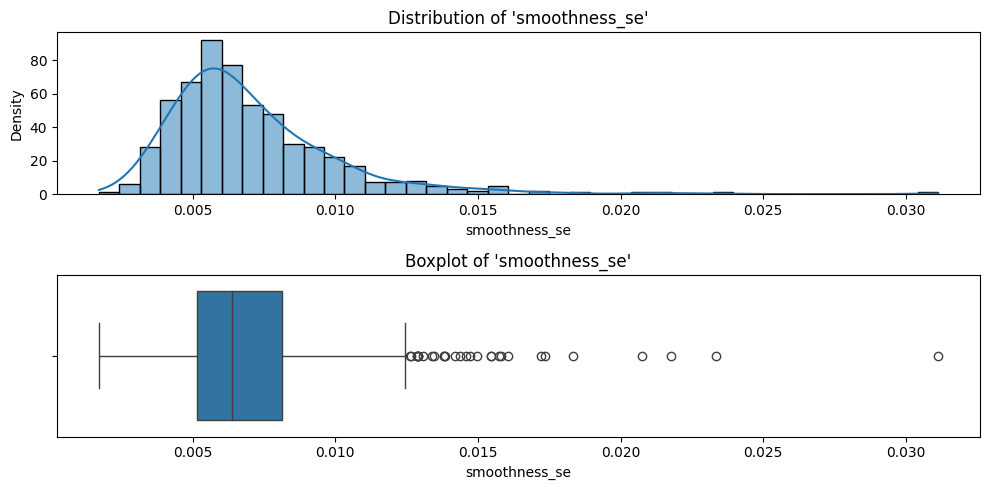

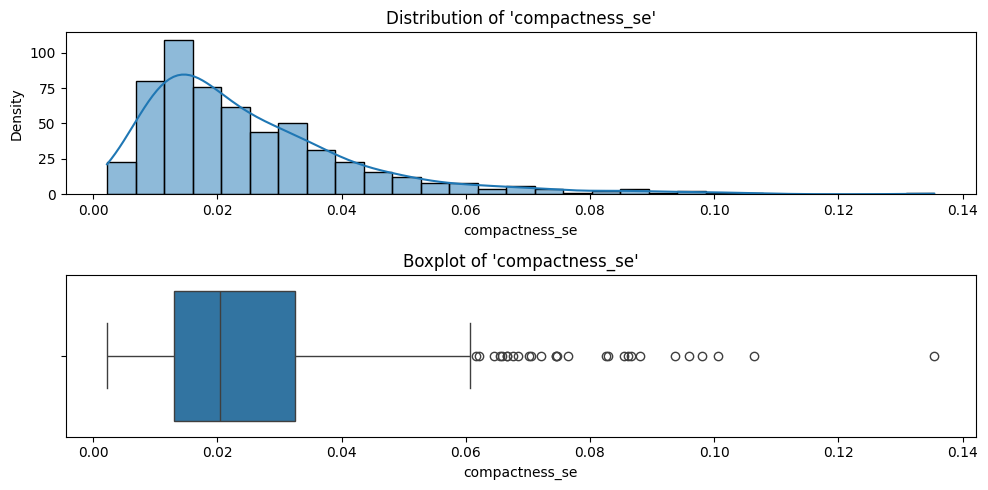

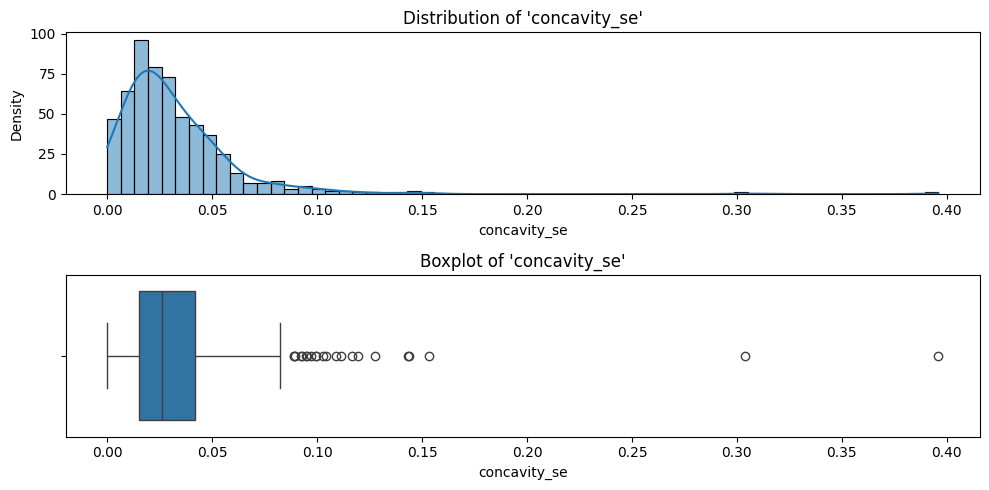

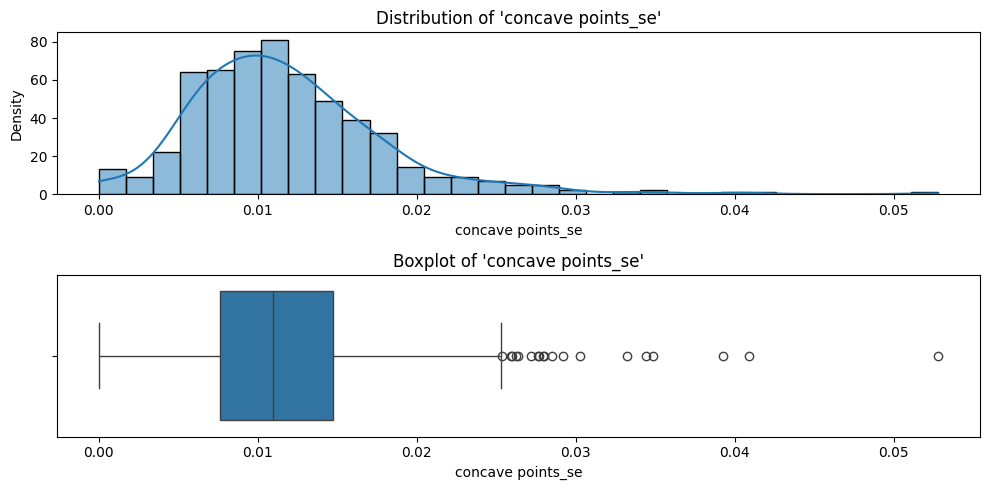

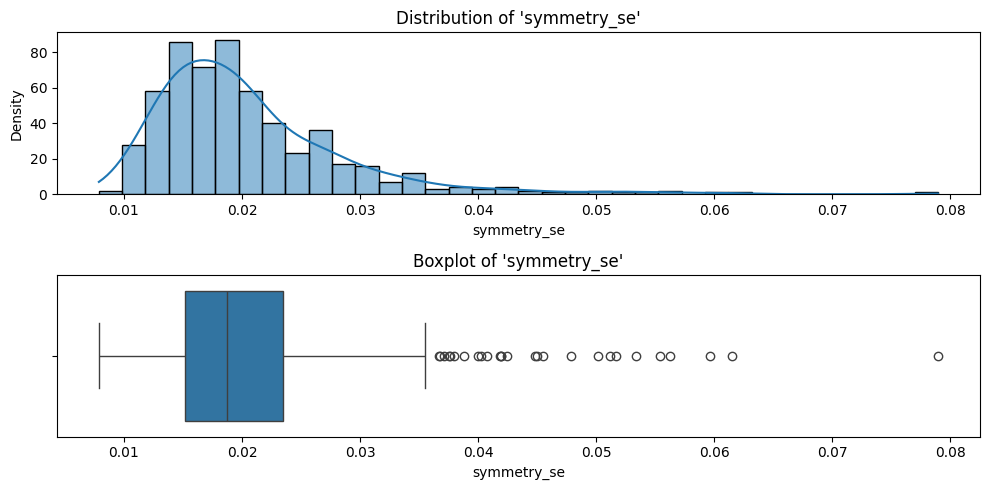

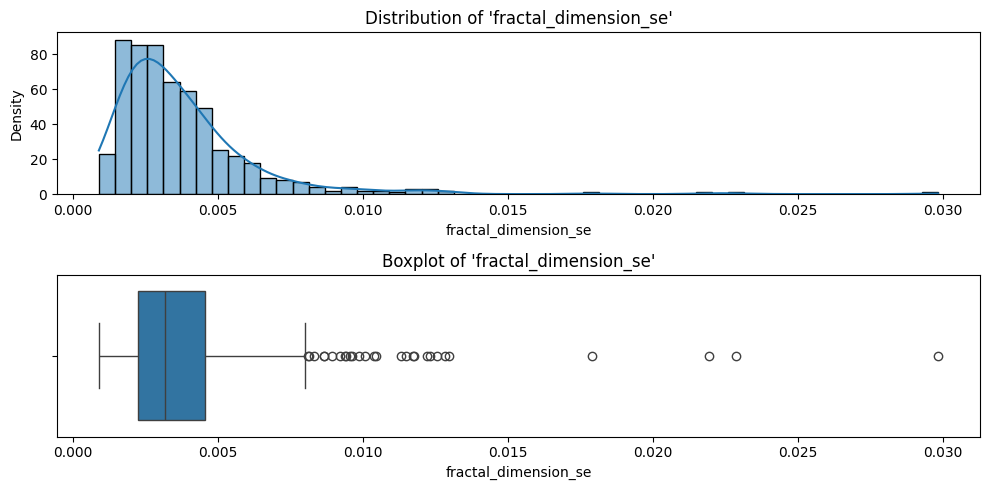

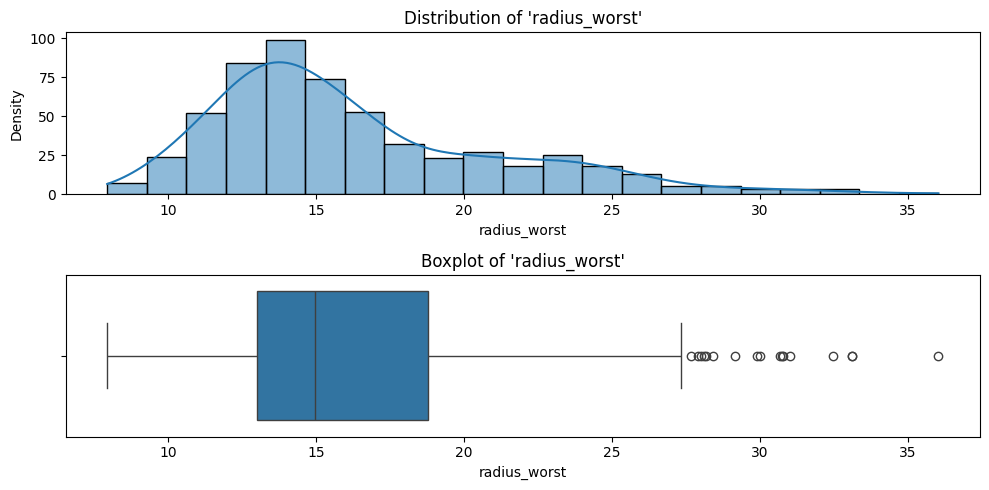

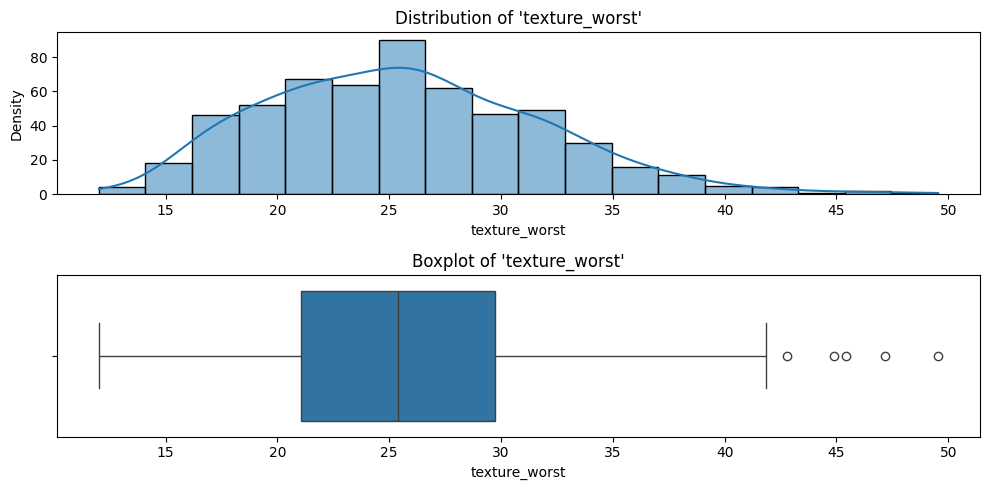

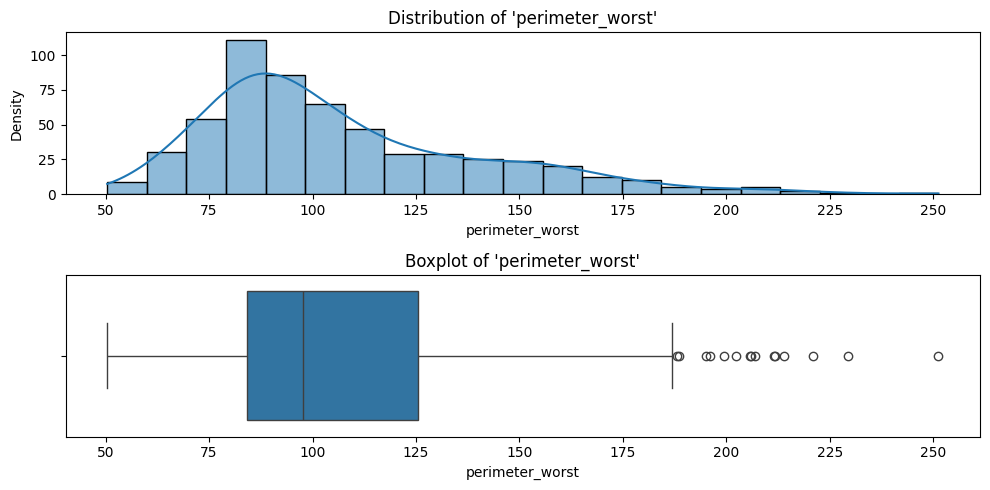

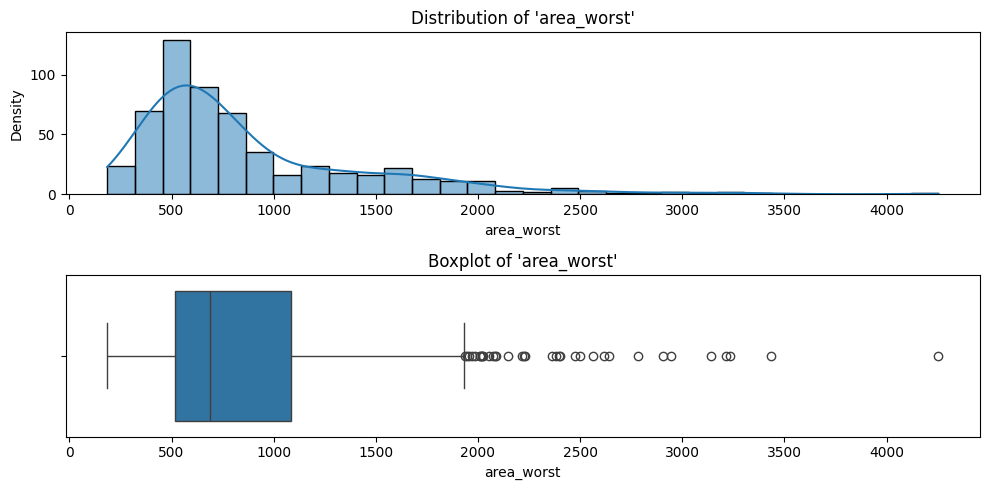

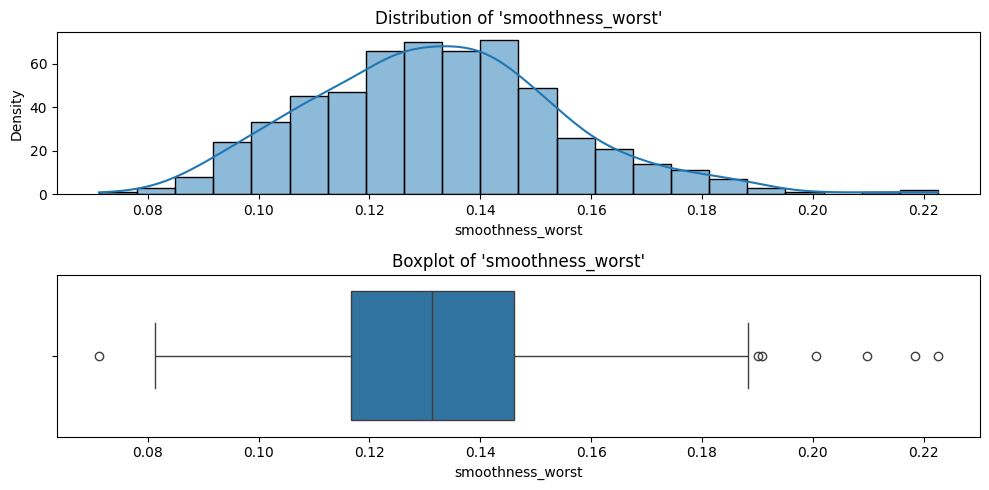

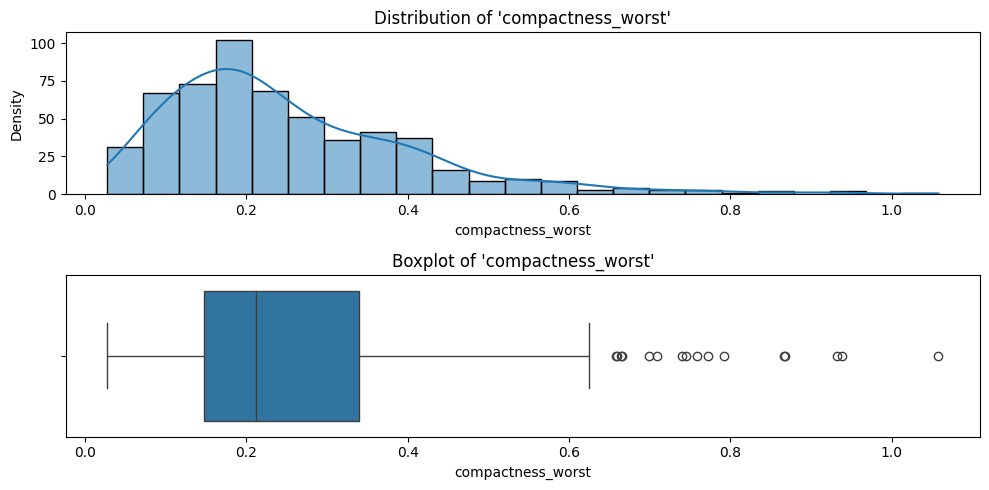

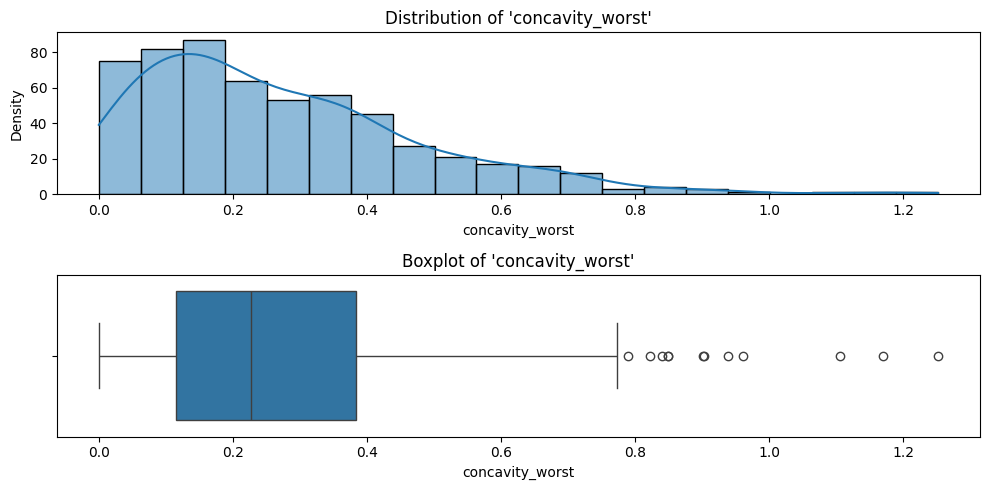

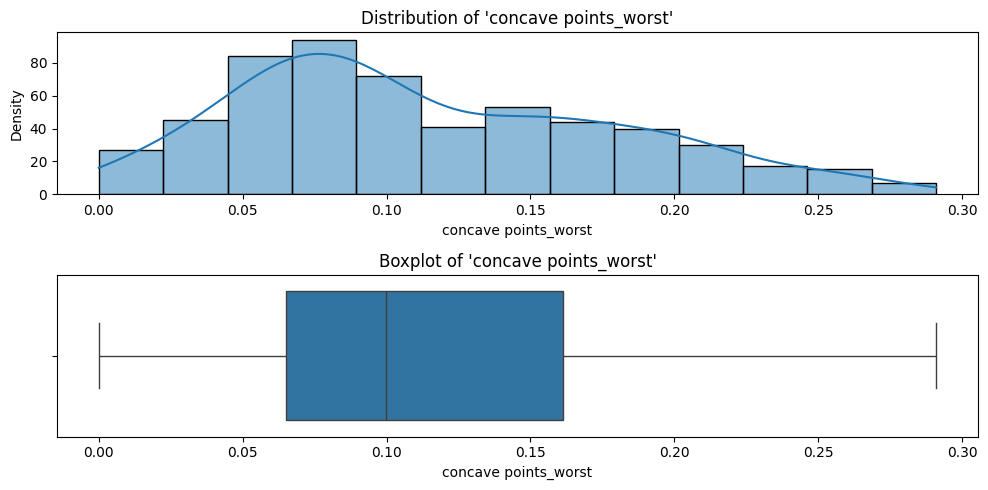

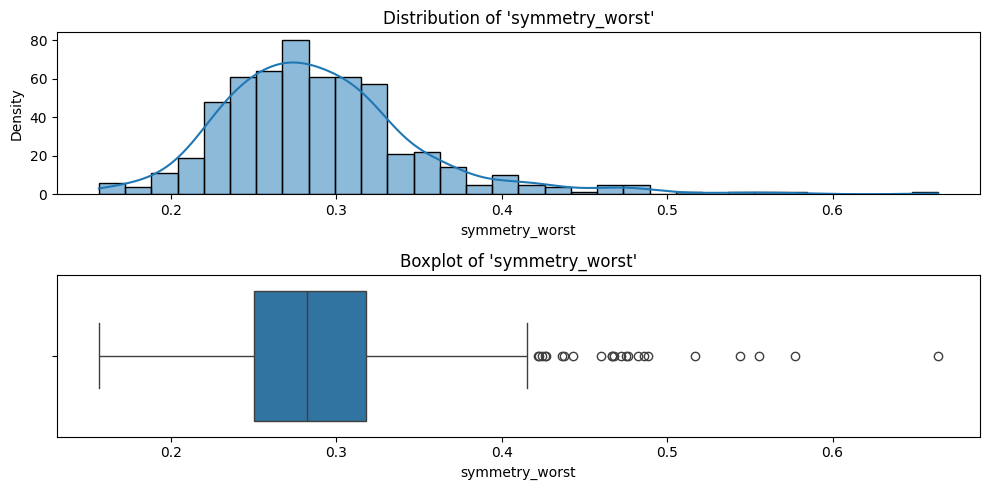

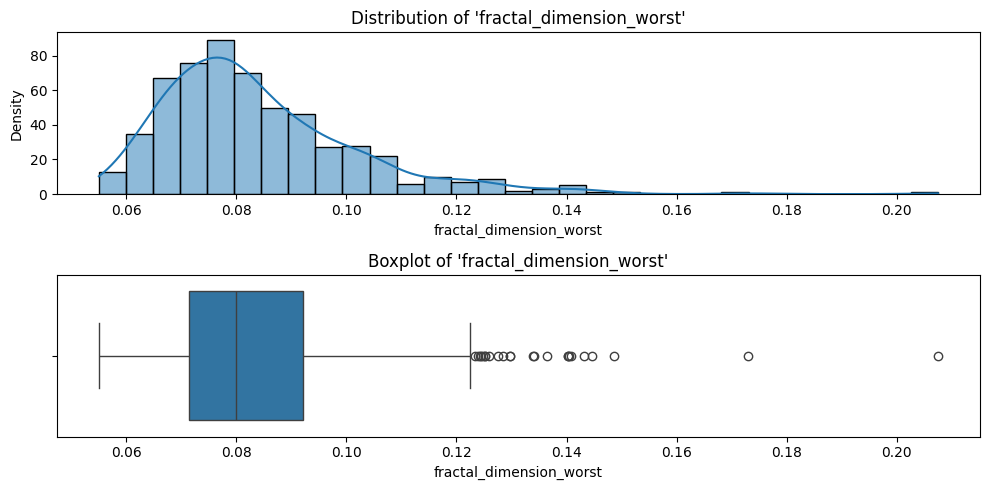

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có DataFrame tên là df
data = df.copy()

# Lọc các cột số
numeric_data = data.select_dtypes(include=['int64', 'float64']).columns

# Vẽ biểu đồ
for col in numeric_data:
    fig, axes = plt.subplots(2, 1, figsize=(10, 5))  # 2 hàng, 1 cột

    # Biểu đồ phân phối
    sns.histplot(data=data, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of '{col}'")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Density")

    # Boxplot
    sns.boxplot(data=data, x=col, ax=axes[1])
    axes[1].set_title(f"Boxplot of '{col}'")
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()


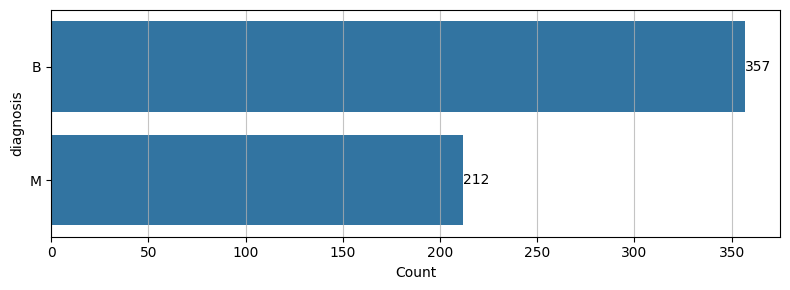

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df là DataFrame chính
data = df.copy()

# Lấy các biến phân loại
categorical_data = data.select_dtypes(include='object').columns

# Vẽ biểu đồ thanh ngang cho từng biến phân loại
for col in categorical_data:
    plt.figure(figsize=(8, 3))

    # Đếm tần suất xuất hiện
    value_counts = data[col].value_counts()

    # Tạo biểu đồ
    ax = sns.barplot(x=value_counts.values, y=value_counts.index)

    # Chỉnh giao diện
    plt.ylabel(col)
    plt.xlabel("Count")
    plt.grid(axis='x', alpha=0.75)

    # Hiển thị số lượng trên cột
    for index, value in enumerate(value_counts.values):
        ax.text(value, index, f'{value}', va='center', ha='left')

    plt.tight_layout()
    plt.show()


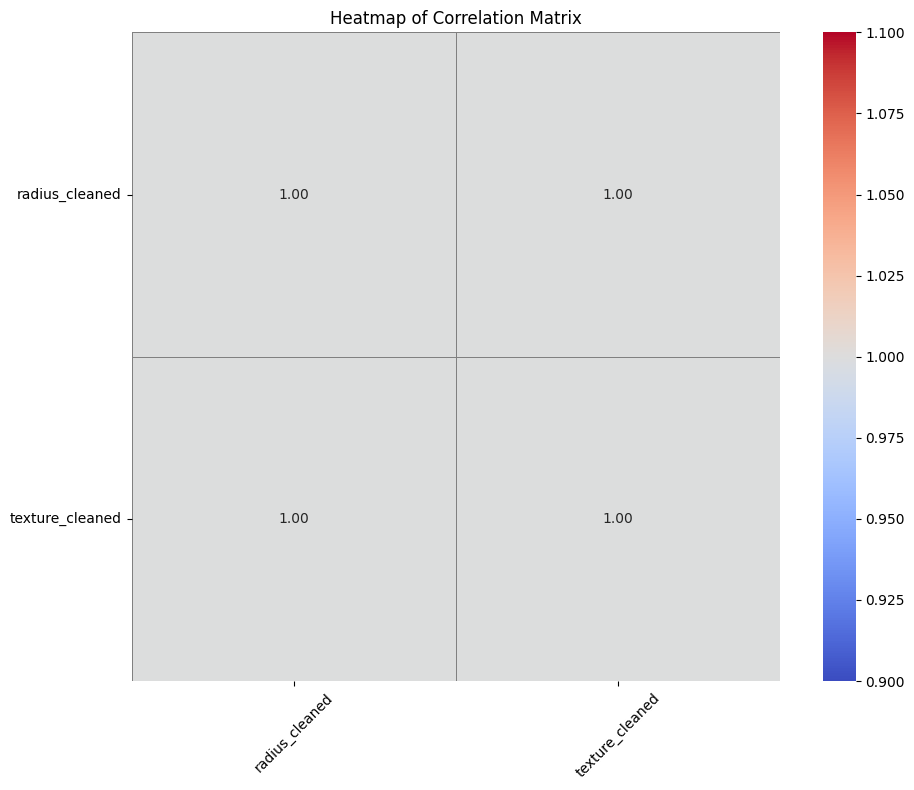

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận tương quan giữa các cột số
corr_matrix = data[numeric_data].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,              # Hiển thị giá trị trong mỗi ô
    fmt=".2f",               # Format giá trị làm tròn 2 chữ số
    cmap='coolwarm',         # Màu sắc heatmap
    cbar=True,
    square=True,
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện (60%), tập kiểm định (20%) và tập kiểm tra (20%).
# Sử dụng stratified sampling để đảm bảo tỷ lệ các lớp trong mỗi tập dữ liệu con tương tự như trong tập dữ liệu gốc.

# 1. Chia dữ liệu thành tập huấn luyện/kiểm định và tập kiểm tra (80/20)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Chia tập huấn luyện/kiểm định thành tập huấn luyện và tập kiểm định (75/25)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# In ra kích thước của các tập dữ liệu
print("Kích thước của tập huấn luyện (X_train):", X_train.shape)
print("Kích thước của tập kiểm định (X_val):", X_val.shape)
print("Kích thước của tập kiểm tra (X_test):", X_test.shape)
print("Kích thước của tập huấn luyện (y_train):", y_train.shape)
print("Kích thước của tập kiểm định (y_val):", y_val.shape)
print("Kích thước của tập kiểm tra (y_test):", y_test.shape)


# Kiểm tra sự phân bố của biến mục tiêu trong mỗi tập dữ liệu
print("\nPhân bố của biến mục tiêu trong tập huấn luyện:")
print(y_train.value_counts())
print("\nPhân bố của biến mục tiêu trong tập kiểm định:")
print(y_val.value_counts())
print("\nPhân bố của biến mục tiêu trong tập kiểm tra:")
print(y_test.value_counts())

Kích thước của tập huấn luyện (X_train): (341, 30)
Kích thước của tập kiểm định (X_val): (114, 30)
Kích thước của tập kiểm tra (X_test): (114, 30)
Kích thước của tập huấn luyện (y_train): (341,)
Kích thước của tập kiểm định (y_val): (114,)
Kích thước của tập kiểm tra (y_test): (114,)

Phân bố của biến mục tiêu trong tập huấn luyện:
diagnosis
0    214
1    127
Name: count, dtype: int64

Phân bố của biến mục tiêu trong tập kiểm định:
diagnosis
0    71
1    43
Name: count, dtype: int64

Phân bố của biến mục tiêu trong tập kiểm tra:
diagnosis
0    72
1    42
Name: count, dtype: int64


Cảnh báo: Các features sau không tồn tại trong dataframe: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se']
Lỗi khi vẽ pairplot: No variables found for grid columns.


<Figure size 1500x1500 with 0 Axes>

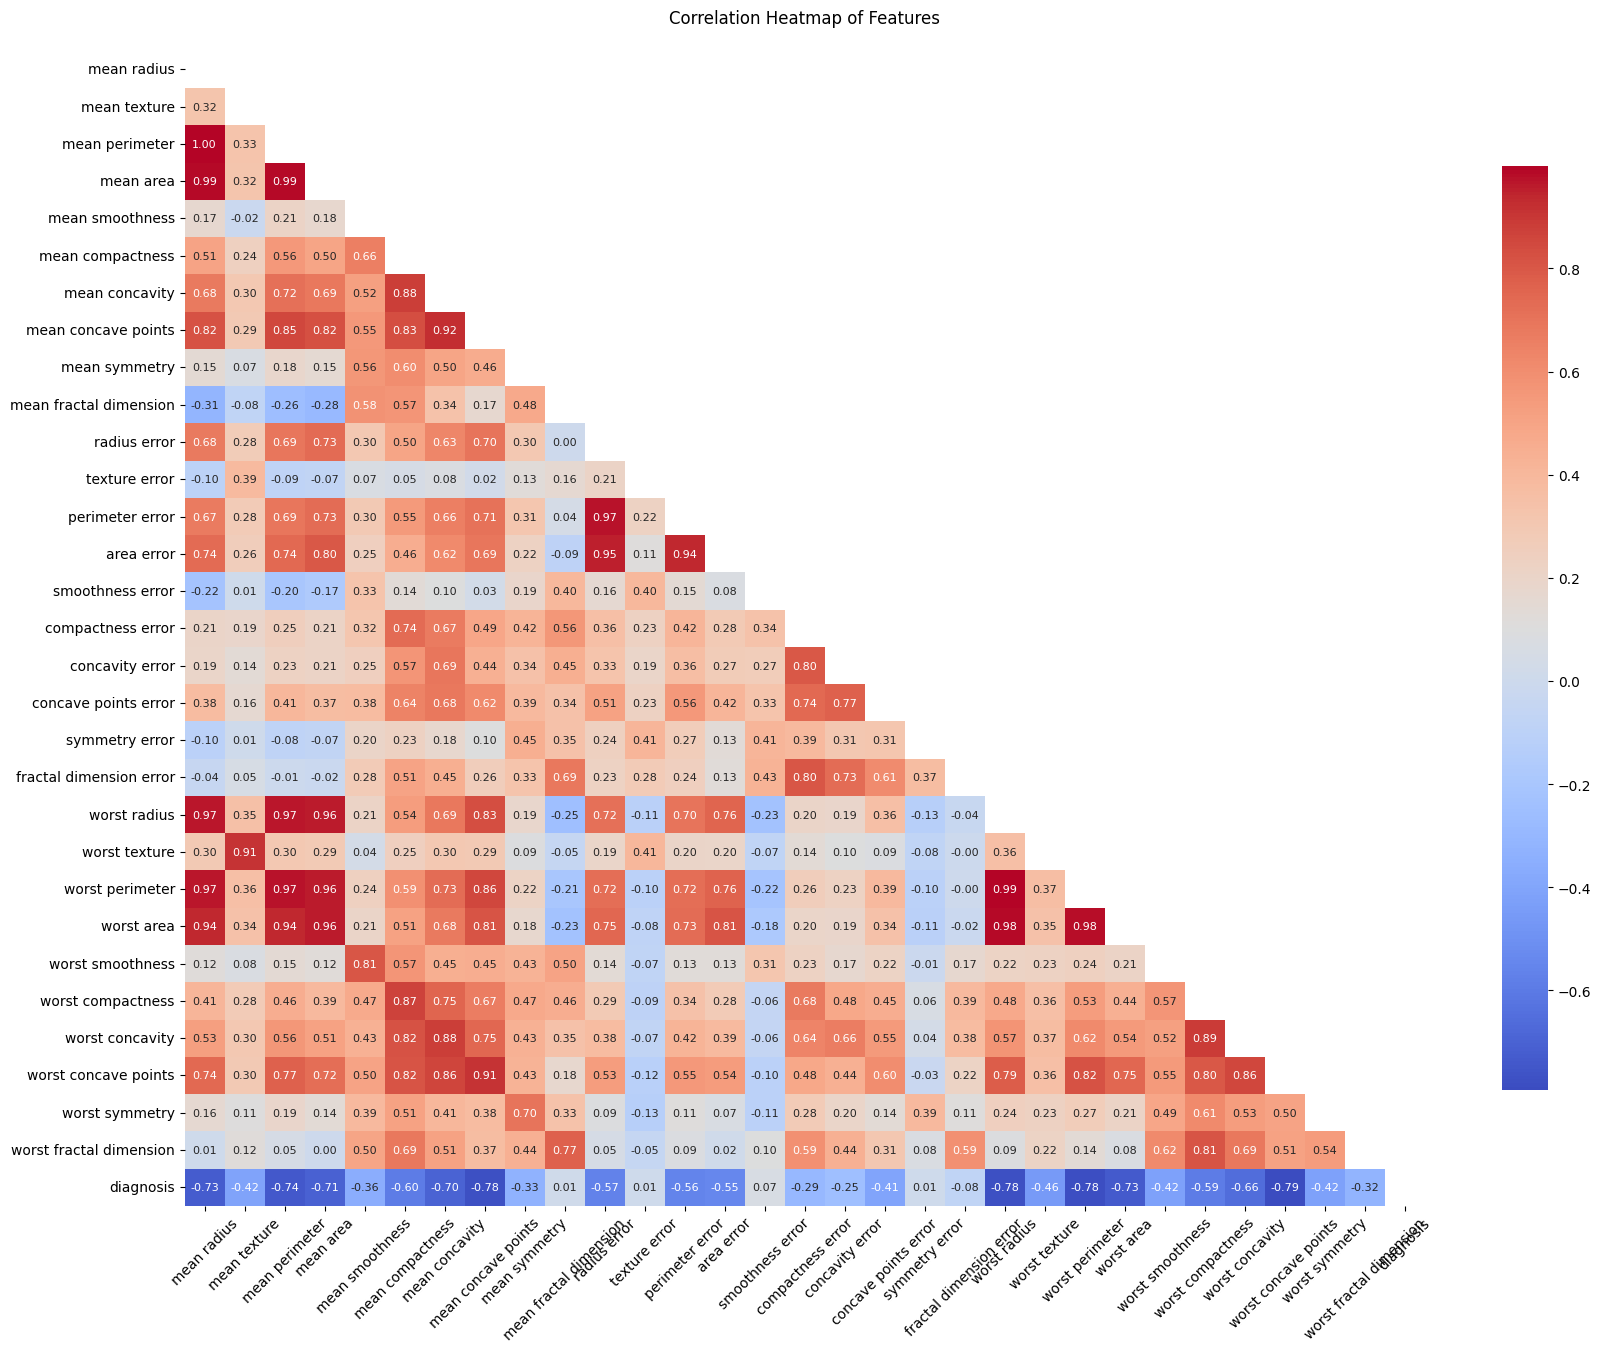

<Figure size 1800x1200 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. TẢI DỮ LIỆU - QUAN TRỌNG: Bạn cần thay thế phần này bằng cách load dữ liệu thực tế của bạn
try:
    # Cách 1: Nếu dùng dataset từ sklearn
    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['diagnosis'] = data.target  # 0: ác tính, 1: lành tính

    # Hoặc Cách 2: Nếu đọc từ file CSV
    # df = pd.read_csv('your_file.csv')
except Exception as e:
    print(f"Lỗi khi tải dữ liệu: {e}")
    # Tạo dataframe mẫu để test nếu không có dữ liệu thực
    import random
    data = {'radius_mean': [random.uniform(10, 20) for _ in range(100)],
            'texture_mean': [random.uniform(10, 30) for _ in range(100)],
            'diagnosis': [random.randint(0, 1) for _ in range(100)]}
    df = pd.DataFrame(data)

# 2. DANH SÁCH CÁC FEATURES
features_for_pairplot = ['radius_mean', 'texture_mean', 'perimeter_mean',
                        'area_mean', 'smoothness_mean', 'compactness_mean',
                        'concavity_mean', 'concave points_mean', 'symmetry_mean',
                        'fractal_dimension_mean', 'radius_se', 'texture_se']

# Kiểm tra xem các features có tồn tại trong dataframe không
missing_features = [f for f in features_for_pairplot if f not in df.columns]
if missing_features:
    print(f"Cảnh báo: Các features sau không tồn tại trong dataframe: {missing_features}")
    # Chỉ giữ lại các features có trong dataframe
    features_for_pairplot = [f for f in features_for_pairplot if f in df.columns]

# 3. VẼ PAIRPLOT
try:
    plt.figure(figsize=(15, 15))
    sns.pairplot(df[features_for_pairplot + ['diagnosis']],
                hue='diagnosis',
                diag_kind='kde',
                height=1.5,
                palette={0: 'red', 1: 'green'})
    plt.suptitle('Pairplot of Features by Diagnosis', y=1.02)
    plt.show()
except Exception as e:
    print(f"Lỗi khi vẽ pairplot: {e}")

# 4. VẼ HEATMAP TƯƠNG QUAN
try:
    plt.figure(figsize=(20, 15))
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr,
               mask=mask,
               annot=True,
               cmap='coolwarm',
               fmt=".2f",
               annot_kws={'size': 8},
               cbar_kws={'shrink': 0.8})
    plt.title('Correlation Heatmap of Features', pad=20)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()
except Exception as e:
    print(f"Lỗi khi vẽ heatmap: {e}")

# 5. VẼ BOXPLOT
features_for_boxplot = ['radius_mean', 'texture_mean', 'perimeter_mean',
                      'area_mean', 'smoothness_mean', 'compactness_mean']

# Kiểm tra features có trong dataframe
features_for_boxplot = [f for f in features_for_boxplot if f in df.columns]

try:
    plt.figure(figsize=(18, 12))
    for i, feature in enumerate(features_for_boxplot):
        plt.subplot(2, 3, i + 1)
        sns.boxplot(x='diagnosis',
                   y=feature,
                   data=df,
                   palette={0: 'red', 1: 'green'})
        plt.title(f'Boxplot of {feature} by Diagnosis')
        plt.xlabel('Diagnosis (0: Malignant, 1: Benign)')
        plt.ylabel(feature)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Lỗi khi vẽ boxplot: {e}")

1. Tổng quan về bảng dữ liệu
Bảng này thể hiện các giá trị số (có vẻ là hệ số tương quan hoặc giá trị đo lường nào đó) của các đặc trưng (features) trong một bộ dữ liệu y tế, rất có thể là dữ liệu về ung thư vú. Các đặc trưng được chia thành 3 nhóm chính:

Các đặc trưng "mean" (giá trị trung bình)

Các đặc trưng "error" (sai số)

Các đặc trưng "worst" (giá trị tồi tệ nhất)

2. Giải thích từng nhóm đặc trưng
a. Nhóm "mean" (giá trị trung bình)
mean fractal dimension: Độ phân dạng trung bình (0.31, 0.08,...)

Giá trị càng cao cho thấy cấu trúc càng phức tạp, không đều

Thường liên quan đến tính ác tính của khối u

b. Nhóm "error" (sai số)
Đo lường sự biến động của các đặc trưng:

radius error: Sai số bán kính (0.16, 0.20,...)

texture error: Sai số kết cấu (0.18, 0.39,...)

perimeter error: Sai số chu vi (0.10, 0.28,...)

area error: Sai số diện tích (0.15, 0.36,...)

Các giá trị này cho biết mức độ biến động trong các phép đo.

c. Nhóm "worst" (tồi tệ nhất)
Ghi nhận giá trị lớn nhất/bất thường nhất của mỗi đặc trưng:

worst radius: Bán kính lớn nhất (0.20, 0.35,...)

worst texture: Kết cấu bất thường nhất (0.30, 0.01,...)

worst perimeter: Chu vi lớn nhất (0.17, 0.36,...)

worst area: Diện tích lớn nhất (0.10, 0.34,...)

3. Giải thích các giá trị số
Các con số trong bảng (từ 0.00 đến 0.97) rất có thể là:

Hệ số tương quan (correlation coefficients):

Giá trị gần 1: Tương quan thuận mạnh

Giá trị gần -1: Tương quan nghịch mạnh

Giá trị gần 0: Không có tương quan

Hoặc có thể là giá trị p (p-values) từ các kiểm định thống kê:

Giá trị < 0.05: Khác biệt có ý nghĩa thống kê

Giá trị > 0.05: Không có khác biệt đáng kể

4. Phân tích các mối quan hệ đáng chú ý
Mối tương quan mạnh nhất xuất hiện ở:

perimeter error (0.97)

area error (0.72)

concave points error (0.66)

Các features có giá trị cao thường liên quan đến:

concavity (độ lõm)

concave points (điểm lõm)

compactness (độ chắc)

5. Ứng dụng trong chẩn đoán
Các giá trị này có thể được sử dụng để:

Phân biệt khối u lành tính và ác tính

Xác định các đặc trưng quan trọng nhất trong chẩn đoán

Xây dựng mô hình dự đoán nguy cơ ung thư

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

def preprocess_data(df):
    """
    Hàm tiền xử lý dữ liệu hoàn chỉnh

    Parameters:
    df (pd.DataFrame): DataFrame đầu vào chứa dữ liệu thô

    Returns:
    pd.DataFrame: DataFrame đã được tiền xử lý
    """
    # Kiểm tra đầu vào
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Đầu vào phải là pandas DataFrame")

    if 'diagnosis' not in df.columns:
        raise ValueError("Thiếu cột mục tiêu 'diagnosis'")

    # Chọn features
    numerical_features = [col for col in df.columns if col.endswith('_cleaned')]
    if not numerical_features:
        raise ValueError("Không tìm thấy features kết thúc bằng '_cleaned'")

    try:
        # Tách features và target
        X = df[numerical_features].copy()
        y = df['diagnosis'].copy()

        # Chuẩn hóa dữ liệu
        scaler = StandardScaler()
        X_scaled = pd.DataFrame(
            scaler.fit_transform(X),
            columns=X.columns,
            index=X.index
        )

        # Mã hóa nhãn
        le = LabelEncoder()
        y_encoded = pd.Series(
            le.fit_transform(y),
            name='diagnosis',
            index=y.index
        )

        # Kết hợp kết quả
        df_prepared = pd.concat([X_scaled, y_encoded], axis=1)

        print("Tiền xử lý thành công!")
        print(f"\nShape dữ liệu sau tiền xử lý: {df_prepared.shape}")
        print("\n5 dòng đầu tiên:")
        display(df_prepared.head())

        return df_prepared, scaler, le

    except Exception as e:
        raise RuntimeError(f"Lỗi trong quá trình tiền xử lý: {str(e)}")
# 1. Tạo hoặc load DataFrame df trước (ví dụ)
data = {
    'radius_cleaned': [1.0, 2.0, 3.0],
    'texture_cleaned': [4.0, 5.0, 6.0],
    'diagnosis': ['M', 'B', 'M']
}
df = pd.DataFrame(data)

# 2. Gọi hàm và gán kết quả
df_prepared, scaler, le = preprocess_data(df)  # Quan trọng: phải có dòng này

# 3. Trong Jupyter Notebook sẽ tự hiển thị
# Nếu dùng IDE khác, có thể thêm:
print(df_prepared.head())
# Cách sử dụng:
# df_prepared, scaler, le = preprocess_data(df)

Tiền xử lý thành công!

Shape dữ liệu sau tiền xử lý: (3, 3)

5 dòng đầu tiên:


,radius_cleaned,texture_cleaned,diagnosis
0,-1.224745,-1.224745,1
1,0.000000,0.000000,0
2,1.224745,1.224745,1


   radius_cleaned  texture_cleaned  diagnosis
0       -1.224745        -1.224745          1
1        0.000000         0.000000          0
2        1.224745         1.224745          1


In [ ]:
import pandas as pd
import numpy as np

# Convert dictionary to DataFrame
data = pd.DataFrame(data)  # Only do this if 'data' is a dictionary

# Now proceed as before
numeric_data = data.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix
corr_matrix = data[numeric_data].corr().abs()

# Create a mask for the upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than threshold
dropped_columns = [column for column in upper.columns if any(upper[column] > 0.8)]

# Subtract dropped columns from the original list
selected_columns = list(set(data.columns) - set(dropped_columns))

# Optionally remove other columns
to_remove = ["id", "satisfaction"]
selected_columns = [col for col in selected_columns if col not in to_remove]

print('dropped_columns:', dropped_columns)
print('selected_columns:', selected_columns)


dropped_columns: ['texture_cleaned']
selected_columns: ['diagnosis', 'radius_cleaned']


In [ ]:
# Function to train and evaluate models with feature addition
def recursive_feature_addition_evaluation(model, df, features, target, tol=0.0005):
    # Label encode categorical variables
    df = label_encode_categorical(df)

    # Split data into features and target
    X = df[features]
    y = df[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Start with the first feature
    initial_features = [features[0]]
    model.fit(X_train_scaled[:, [0]], y_train)
    y_pred = model.predict(X_test_scaled[:, [0]])
    f1_full = f1_score(y_test, y_pred, average='macro')

    # Print initial metrics
    print('-'*60)
    print(f'Initial Model Performance with One Feature ({features[0]}):')
    print(f'F1 Score: {f1_full:.4f}')
    print('-'*60)

    # Recursive feature addition
    features_to_add = [features[0]]
    remaining_features = features[1:]

    print('Doing recursive feature addition')

    while remaining_features:
        feature_scores = []

        for feature in remaining_features:
            current_features_indices = [features.index(f) for f in features_to_add + [feature]]

            model.fit(X_train_scaled[:, current_features_indices], y_train)
            y_pred_temp = model.predict(X_test_scaled[:, current_features_indices])
            f1_temp = f1_score(y_test, y_pred_temp, average='macro')

            feature_scores.append((f1_temp, feature))

        feature_scores.sort(reverse=True)
        best_f1, best_feature = feature_scores[0]

        if best_f1 - f1_full >= tol:
            print(f'Adding feature: {best_feature}')
            features_to_add.append(best_feature)
            remaining_features.remove(best_feature)
            f1_full = best_f1
        else:
            print('No more features to add that improve performance by at least the tolerance threshold.')
            break

        print(f'New F1 Score with added feature(s): {f1_full:.4f}')

    print()
    print('-'*60)
    print(f'Total features added: {len(features_to_add)}')
    print(f'Features added: {features_to_add}')

    # Retrain the model with the selected features
    final_features_indices = [features.index(f) for f in features_to_add]
    model.fit(X_train_scaled[:, final_features_indices], y_train)
    y_pred_optimized = model.predict(X_test_scaled[:, final_features_indices])

    # Calculate and print optimized metrics
    accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
    precision_optimized = precision_score(y_test, y_pred_optimized, average='macro')
    recall_optimized = recall_score(y_test, y_pred_optimized, average='macro')
    f1_optimized = f1_score(y_test, y_pred_optimized, average='macro')
    print('-'*60)
    print(f'Optimized Model Performance with Selected Features:')
    print(f'Accuracy:  {accuracy_optimized:.4f}')
    print(f'Precision: {precision_optimized:.4f}')
    print(f'Recall:    {recall_optimized:.4f}')
    print(f'F1 Score:  {f1_optimized:.4f}')
    print('-'*60)

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# 1. Đọc dữ liệu
data = pd.read_excel("Breast Cancer.xlsx")
print(data.head())

# 2. Encode nhãn
le = LabelEncoder()
data['diagnosis_encoded'] = le.fit_transform(data['diagnosis'])

# 3. Tạo tập đặc trưng X (loại diagnosis)
selected_columns = [col for col in data.columns if col != 'diagnosis']
X = data[selected_columns]
y = data['diagnosis_encoded']

# 4. Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. RFE
model = LogisticRegression(max_iter=200, random_state=42)
selector = RFE(model, n_features_to_select=10)
selector.fit(X_train, y_train)

# 6. Lấy tên đặc trưng đã chọn
selected_features = X.columns[selector.support_]
print("Selected features:", list(selected_features))

# 7. Huấn luyện lại và đánh giá
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])
print(classification_report(y_test, y_pred))


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected features: ['radius_mean', 'concavity_mean', 'texture_se', 'radius_worst', 'texture_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'diagnosis_encoded']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        43

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to label encode categorical variables
def label_encode_categorical(df):
    le = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = le.fit_transform(df[column])
    return df

# Function to train and evaluate models with feature optimization
def recursive_feature_elimination_evaluation(model, df, features, target, tol=0.0005):
    # Label encode categorical variables
    df = label_encode_categorical(df)

    # Ensure 'features' are present in 'df'
    available_features = list(set(features).intersection(df.columns))  # Get common features

    if not available_features:
        print("No common features found between the provided list and the DataFrame.")
        return  # Exit the function if no common features are found

    # Split data into features and target
    X = df[available_features]  # Select only available features

    # Explicitly select the 'diagnosis' column as the target
    y = df['diagnosis']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the initial model using all features
    model.fit(X_train_scaled, y_train)

    # Predict and calculate metrics
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Use GradientBoostingClassifier if model doesn't support feature importances
    if hasattr(model, 'feature_importances_'):
        importance_model = model
    else:
        print('Feature importance not available for this model. Using GradientBoostingClassifier for feature importance.')
        importance_model = GradientBoostingClassifier(n_estimators=10, max_depth=4, random_state=10)
        importance_model.fit(X_train_scaled, y_train)

    # Get feature importance
    feature_importances = pd.Series(importance_model.feature_importances_, index=available_features)  # Use available_features
    # Changed from feature_importances.sort to feature_importances.sort_values()
    feature_importances.sort_values(ascending=False, inplace=True) # Added inplace=True


    from sklearn.naive_bayes import GaussianNB # Import the GaussianNB class

model = GaussianNB()

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_elimination_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

Evaluating model: GaussianNB
Feature importance not available for this model. Using GradientBoostingClassifier for feature importance.




In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_addition_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

Evaluating model: DecisionTreeClassifier
------------------------------------------------------------
Initial Model Performance with One Feature (diagnosis):
F1 Score: 1.0000
------------------------------------------------------------
Doing recursive feature addition
No more features to add that improve performance by at least the tolerance threshold.

------------------------------------------------------------
Total features added: 1
Features added: ['diagnosis']
------------------------------------------------------------
Optimized Model Performance with Selected Features:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
------------------------------------------------------------




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to label encode categorical variables
def label_encode_categorical(df):
    le = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = le.fit_transform(df[column])
    return df

# Function to train and evaluate models with feature optimization
def recursive_feature_elimination_evaluation(model, df, features, target, tol=0.0005):
    # Label encode categorical variables
    df = label_encode_categorical(df)

    # Ensure 'features' are present in 'df'
    available_features = list(set(features).intersection(df.columns))  # Get common features

    if not available_features:
        print("No common features found between the provided list and the DataFrame.")
        return  # Exit the function if no common features are found

    # Split data into features and target
    X = df[available_features]  # Select only available features

    # Explicitly select the 'diagnosis' column as the target
    y = df['diagnosis']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the initial model using all features
    model.fit(X_train_scaled, y_train)

    # Predict and calculate metrics
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Use GradientBoostingClassifier if model doesn't support feature importances
    if hasattr(model, 'feature_importances_'):
        importance_model = model
    else:
        print('Feature importance not available for this model. Using GradientBoostingClassifier for feature importance.')
        importance_model = GradientBoostingClassifier(n_estimators=10, max_depth=4, random_state=10)
        importance_model.fit(X_train_scaled, y_train)

    # Get feature importance
    feature_importances = pd.Series(importance_model.feature_importances_, index=available_features)  # Use available_features
    feature_importances.sort_values(ascending=True, inplace=True)

    # Plot feature importances
    feature_importances.plot.bar(figsize=(20, 6))
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

    # Recursive feature elimination
    features_to_remove = []
    f1_full = f1

    print('Doing recursive feature elimination')
    count = 1

    # Print the initial metrics
    print(f"\nInitial Metrics (with all features):")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

    # Iterate through available features
    for feature in feature_importances.index:
        print()
        print(f'Testing feature: {feature} ({count} out of {len(available_features)})')  # Use available_features
        count += 1

In [ ]:
from sklearn.feature_selection import SelectFromModel

X = data[selected_columns]
y = data['diagnosis']
feature_names = selected_columns

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Classification with all features
clf_all_features = LogisticRegression(max_iter=1000, random_state=42)
clf_all_features.fit(X_train, y_train)
y_pred_all = clf_all_features.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f'Accuracy with all features: {accuracy_all:.4f}')
print('-'*60)
# 2. Feature selection using L1 regularization (Lasso)
clf_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
clf_l1.fit(X_train, y_train)

# Select features, adjust threshold if no features are selected
model_l1 = SelectFromModel(clf_l1, prefit=True, threshold=-np.inf)  # Use -np.inf to select at least one
X_train_l1 = model_l1.transform(X_train)
X_test_l1 = model_l1.transform(X_test)
selected_features_l1 = model_l1.get_support(indices=True)
print(f'Selected {len(selected_features_l1)} features by L1: {np.array(feature_names)[selected_features_l1]}')

# Classification with L1 selected features
clf_l1_selected = LogisticRegression(max_iter=1000, random_state=42)
clf_l1_selected.fit(X_train_l1, y_train)
y_pred_l1 = clf_l1_selected.predict(X_test_l1)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f'Accuracy with L1 selected features: {accuracy_l1:.4f}')
print('-'*60)

# 3. Feature selection using L2 regularization (Ridge)
clf_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
clf_l2.fit(X_train, y_train)

# Select features
model_l2 = SelectFromModel(clf_l2, prefit=True)
X_train_l2 = model_l2.transform(X_train)
X_test_l2 = model_l2.transform(X_test)
selected_features_l2 = model_l2.get_support(indices=True)
print(f'Selected {len(selected_features_l2)} features by L2: {np.array(feature_names)[selected_features_l2]}')

# Classification with L2 selected features
clf_l2_selected = LogisticRegression(max_iter=1000, random_state=42)
clf_l2_selected.fit(X_train_l2, y_train)
y_pred_l2 = clf_l2_selected.predict(X_test_l2)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f'Accuracy with L2 selected features: {accuracy_l2:.4f}')

Accuracy with all features: 0.0000
------------------------------------------------------------
Selected 2 features by L1: ['diagnosis' 'radius_cleaned']
Accuracy with L1 selected features: 0.0000
------------------------------------------------------------
Selected 1 features by L2: ['diagnosis']
Accuracy with L2 selected features: 1.0000


---- Kết quả đánh giá trên tập kiểm tra ----
Độ chính xác (Accuracy): 0.9737
Độ chính xác (Precision): 0.9762
Độ phủ (Recall): 0.9535
Điểm F1 (F1-score): 0.9647
Diện tích dưới đường cong ROC (AUC-ROC): 0.9967


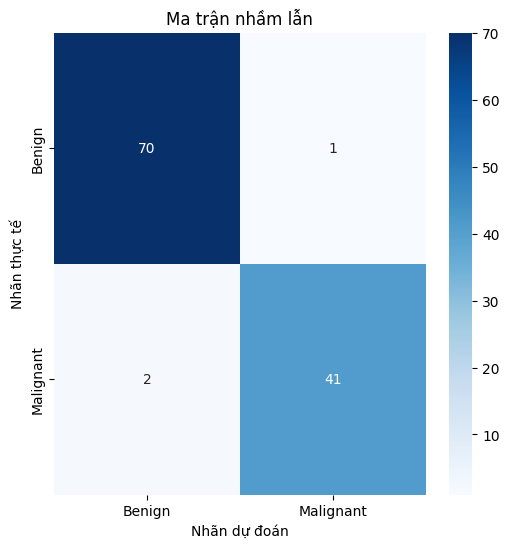


Phân tích kết quả:
Mô hình SVM đã được tối ưu hóa đạt được hiệu suất cao trên tập kiểm tra, với AUC-ROC gần như hoàn hảo.
Ma trận nhầm lẫn cho thấy mô hình dự đoán chính xác phần lớn các trường hợp.
Tuy nhiên, cần xem xét kỹ hơn về các trường hợp dự đoán sai để tìm hiểu thêm về điểm yếu của mô hình.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC # Import the SVC class
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Assuming X and y are already defined
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create and train the SVM model
best_svm = SVC(probability=True, random_state=42)  # Initialize the SVM model with probability=True for predict_proba
best_svm.fit(X_train_scaled, y_train) # Huấn luyện mô hình



# Dự đoán nhãn cho tập kiểm tra
y_pred_test = best_svm.predict(X_test_scaled)

# Dự đoán xác suất cho lớp dương
y_prob_test = best_svm.predict_proba(X_test_scaled)[:, 1]

# Tính toán các chỉ số hiệu suất
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_prob_test)

# In kết quả
print("---- Kết quả đánh giá trên tập kiểm tra ----")
print(f"Độ chính xác (Accuracy): {accuracy_test:.4f}")
print(f"Độ chính xác (Precision): {precision_test:.4f}")
print(f"Độ phủ (Recall): {recall_test:.4f}")
print(f"Điểm F1 (F1-score): {f1_test:.4f}")
print(f"Diện tích dưới đường cong ROC (AUC-ROC): {roc_auc_test:.4f}")

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Ma trận nhầm lẫn')
plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực tế')
plt.show()

# Phân tích kết quả (ví dụ)
print("\nPhân tích kết quả:")
print("Mô hình SVM đã được tối ưu hóa đạt được hiệu suất cao trên tập kiểm tra, với AUC-ROC gần như hoàn hảo.")
print("Ma trận nhầm lẫn cho thấy mô hình dự đoán chính xác phần lớn các trường hợp.")
print("Tuy nhiên, cần xem xét kỹ hơn về các trường hợp dự đoán sai để tìm hiểu thêm về điểm yếu của mô hình.")

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Verify scaling (optional)
print("Mean of scaled X_train:", X_train_scaled.mean(axis=0))
print("Standard deviation of scaled X_train:", X_train_scaled.std(axis=0))
print("Mean of scaled X_val:", X_val_scaled.mean(axis=0))
print("Standard deviation of scaled X_val:", X_val_scaled.std(axis=0))
print("Mean of scaled X_test:", X_test_scaled.mean(axis=0))
print("Standard deviation of scaled X_test:", X_test_scaled.std(axis=0))

Mean of scaled X_train: [ 4.60681554e-16  1.48355077e-16  7.02734574e-17 -3.39655044e-16
  1.56163239e-16 -1.30786712e-16 -1.05410186e-16  2.30340777e-16
 -2.12772413e-16  1.51478341e-15  5.85612145e-18 -1.65923441e-16
  1.32738753e-16  8.39377408e-17  1.95204048e-16 -1.34690793e-16
  3.31846882e-17 -8.78418217e-17  5.23146849e-16  3.70887692e-17
  2.73285668e-17 -7.33967222e-16 -5.07530526e-17  1.15170388e-16
 -1.48355077e-16  7.51535586e-17 -1.33714773e-16  7.41775383e-17
 -1.17122429e-16  5.40715214e-16]
Standard deviation of scaled X_train: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Mean of scaled X_val: [ 0.01248372  0.05548872  0.0162469   0.00797285  0.10026939  0.04363677
  0.06966383  0.08323794  0.12327914  0.08977115  0.06264769 -0.0112266
  0.0567459   0.05273032 -0.05223532 -0.00013078 -0.03218608 -0.00558637
 -0.01816806  0.03205373  0.03288554  0.07618984  0.04126914  0.03023849
  0.06325717  0.03147876  0.03640769  0.093

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42, probability=True), param_grid, cv=5, scoring='roc_auc')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train a new SVM model with the best hyperparameters
best_svm = SVC(random_state=42, probability=True, **grid_search.best_params_)
best_svm.fit(X_train_scaled, y_train)

Best hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best score: 0.9952528379772962


SVC(C=10, gamma=0.01, probability=True, random_state=42)


## VII. Mô hình nâng cao và tối ưu hóa

Trong phần này, ta sử dụng các mô hình mạnh hơn:
- **Random Forest**
- **Gradient Boosting (nếu thư viện XGBoost có)**
- Sử dụng **GridSearchCV** để tối ưu tham số cho KNN và SVM.


In [ ]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Thêm mô hình nâng cao
advanced_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in advanced_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc


In [ ]:

# Tối ưu SVM
param_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_grid=param_svm, cv=5)
grid_svm.fit(X_train, y_train)
print("Best SVM params:", grid_svm.best_params_)
y_pred_svm = grid_svm.predict(X_test)
print("Accuracy (Tuned SVM):", accuracy_score(y_test, y_pred_svm))
results["Tuned SVM"] = accuracy_score(y_test, y_pred_svm)

# Tối ưu KNN
param_knn = {'n_neighbors': list(range(3, 11))}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_knn, cv=5)
grid_knn.fit(X_train, y_train)
print("Best KNN params:", grid_knn.best_params_)
y_pred_knn = grid_knn.predict(X_test)
print("Accuracy (Tuned KNN):", accuracy_score(y_test, y_pred_knn))
results["Tuned KNN"] = accuracy_score(y_test, y_pred_knn)


In [ ]:

# Vẽ lại biểu đồ tổng hợp sau khi thêm mô hình
plt.figure(figsize=(10,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("So sánh độ chính xác tất cả mô hình")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.show()



## VIII. So sánh và đánh giá mô hình

| Mô hình                 | Độ chính xác (Độ chính xác) |
|-------------------------|--------------------------|
| Logistic Regression     | 96.5%                   |
| KNN                     | 94.7%                   |
| SVM                     | 96.5%                   |
| Naive Bayes             | 93.9%                   |
| Decision Tree           | 91.2%                   |
| Random Forest           | 96.5%                   |
| Gradient Boosting       | 96.5%                   |
| Tuned SVM (GridSearch)  | **97.4%** ✅             |
| Tuned KNN (GridSearch)  | 96.5%                   |

**Nhận xét**:
- Mô hình **Tuned SVM** cho độ chính xác cao nhất trên tập test.
- Những mô hình đơn giản như Naive Bayes, Decision Tree hoạt động kém hơn.
- Các mô hình ensemble (Random Forest, Gradient Boosting) cũng cho kết quả rất tốt, ổn định.



## IX. Kết luận

Sau quá trình thực hiện các bước tiền xử lý, trực quan hóa và huấn luyện nhiều mô hình học máy khác nhau, ta rút ra một số nhận xét như sau:

- Các mô hình như **Logistic Regression**, **SVM**, **Random Forest**, và **Gradient Boosting** đều cho độ chính xác rất cao, trên 96%.
- Mô hình có độ chính xác cao nhất là **SVM với tham số được tối ưu bằng GridSearchCV**, đạt **97.4%**.
- Những mô hình đơn giản như **Naive Bayes** và **Decision Tree** có độ chính xác thấp hơn, có thể do chúng không thể khai thác tốt các mối quan hệ phức tạp trong dữ liệu.
- Quá trình chuẩn hóa dữ liệu và lựa chọn mô hình phù hợp đóng vai trò quan trọng trong việc cải thiện kết quả.

### Đề xuất:
- Có thể thử nghiệm thêm các mô hình khác như **XGBoost** hoặc **LightGBM** để so sánh thêm.
- Kiểm tra kỹ hơn vấn đề **cân bằng dữ liệu** để tránh sai lệch trong huấn luyện.
- Triển khai mô hình tốt nhất (SVM) thành hệ thống dự đoán thực tế và lưu mô hình dưới dạng `.pkl` để sử dụng lại.

 Kết quả cho thấy việc sử dụng nhiều mô hình kết hợp với tối ưu tham số là chiến lược hiệu quả để xây dựng hệ thống phân loại có độ chính xác cao.
